# Método CRISP-DM aplicado a la predicción de precios de hogares en el área metropolitana

## Entendimiento del Negocio


https://eafit-my.sharepoint.com/:w:/g/personal/lagonzala1_eafit_edu_co/ETHPB5HNXmZKqmOdtcFGZR4BHfAYmSyKaGVeLXXzUd0zPQ?e=2G8KqK


## Entendimiento de los datos

### Carga de datos:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
plt.rcParams.update({'font.size': 14})
warnings.filterwarnings('ignore')

ugly_data = pd.read_json("readydata.json")


In [2]:
df = pd.read_json("readydata.json")
df.head()

,ID de la propiedad,Tipo de Operacion,Tipo de Inmueble,Departamento,Ciudad,Localidad Principal,Tipo de Localidad Principal,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,...,Es Oficina?,Es Penthouse?,Acepta Permuta?,(paid quota)?,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta,Dirección,URL,Precio con Administración Incluida,Precio
0,192788587,Venta,Apartamento,Antioquia,Bello,Niquia,neighbourhood,59.0,NaN,3,...,False,False,False,True,2025-08-25,2025-09-16,"Apartamento en Venta en Niquia, Bello",/apartamento-en-venta-en-niquia-bello/192788587,275000000,275000000
1,192805940,Venta,Apartamento,Antioquia,Bello,Andalucia,neighbourhood,64.9,64.9,3,...,False,False,False,True,2025-08-29,2025-08-29,"Apartamento en Venta en Andalucia, Bello",/apartamento-en-venta-en-andalucia-bello/19280...,280000000,280000000
2,192833958,Venta,Apartamento,Antioquia,Bello,Bello,city,67.0,NaN,3,...,False,False,False,True,2025-09-04,2025-10-30,Apartamento en Venta en Bello,/apartamento-en-venta-en-bello/192833958,260241000,260000000
3,192839470,Venta,Apartamento,Antioquia,Bello,Bello,city,72.0,72.0,3,...,False,False,False,True,2025-09-05,2025-09-20,Apartamento en Venta en Bello,/apartamento-en-venta-en-bello/192839470,433369521,433000000
4,192852231,Venta,Casa,Antioquia,Bello,Prado,neighbourhood,91.0,91.0,3,...,False,False,False,True,2025-09-09,2025-09-29,"Casa en Venta en Prado, Bello",/casa-en-venta-en-prado-bello/192852231,295000000,295000000


# Breve preparación para posterior análisis


### Orígen de los datos
Antes de proceder, es importante comprender de dónde provienen estos datos.

Estos fueron extraídos de un portal web utilizando ténicas de web scraping, estos datos son disponibles públicamente. 

El web scraping no es infalible, se asume la existencia se ciertos elementos en las páginas que se visitan y, si el nombre de variables cambia, o si estas no aparecen, errores inesperados pueden suceder.

Es por esto que se hace necesario este primer análsis, garantizando la integridad del proceso.

In [3]:
df.shape

(5827, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5827 entries, 0 to 5826
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID de la propiedad                  5827 non-null   int64  
 1   Tipo de Operacion                   5827 non-null   object 
 2   Tipo de Inmueble                    5827 non-null   object 
 3   Departamento                        5827 non-null   object 
 4   Ciudad                              5827 non-null   object 
 5   Localidad Principal                 5823 non-null   object 
 6   Tipo de Localidad Principal         5823 non-null   object 
 7   Metros Cuadrados                    5785 non-null   float64
 8   Metros Cuadrados Construidos        4828 non-null   float64
 9   Estrato                             5827 non-null   int64  
 10  Latitud                             5827 non-null   float64
 11  Longitud                            5827 non-nul

Por lo que podemos ver, hay algunos registros vacíos, por lo tanto no está completo del todo. Sin embargo el dataset no tiene vacíos aparentes que puedan aportar más información acerca del precio del arriendo de los hogares.

## Selección de columnas y leve preparación.

Que algunas columnas sean de tipo "object" es engañoso, object puede contener realmente cualquier cosa. Esto puede sugerir que en algunas columnas hay números donde no debe haber, o strings, o cualquier cosa.

Para ello se verificará lo siguiente:

1- Tipo de operacion: Todas las operaciones deben ser de tipo "Venta" si no hubo fallas en la extracción.

2- Tipo de Inmueble: Analizar los valores únicos de la columna y verificar sean como se espera.

3- Departamento: Todas las filas deberían tener como departamento "Antioquia". 

4- Ciudad: Se deben analizar los elementos únicos de la columna ciudad y contrastar con las ciudades del Área Metropolitana del Valle de Aburrá que se planea usar en el proyecto (Medellín, Envigado, Sabaneta, Itagüi, La Estrella y Bello).

5- Localidad Principal: Al momento de la extracción no es claro aún qué representaba esta etiqueta en el sistema del portal, por esto se hará un análisis de los valores únicos.

6- Tipo de Localidad Principal: Semejante a lo anterior.

7- Analizar la variable "Es Proyecto?" aparentemente booleana y verificar por qué se ha leído como float64.

8- Fechas: Nuevamente, object puede ser cucalquier cosa, se debe intentar la conversión a fecha y analizar si hay algun error por formato incorrecto.

9- Finalmente, analizar las variables booleanas y decidir si  son suficientemente relevantes.

10- Algunos extras

** **Verificar tipo de Operación** **

In [5]:
# Tipo de operacion.

df["Tipo de Operacion"].nunique()

# Sólo hay un tipo de operación, lo cual es congruente, todas las filas son ventas.

1

In [6]:
# Eliminamos la columna pues ya no es relevante para mayor análisis.

df.drop(columns=["Tipo de Operacion"], inplace=True)

** **Verificar tipo de Inmuebles** **

In [7]:
# Verificar los tipos de inmuebles.

df["Tipo de Inmueble"].unique()

# Similarmente, hay dos opciones en el dataset: Apartamento y Casa. Esto es congruente.

array(['Apartamento', 'Casa'], dtype=object)

In [8]:
# Finalmente convertimos la columna a string

df["Tipo de Inmueble"] = df["Tipo de Inmueble"].astype(str)


** **Verificar Departamento** **

In [9]:
df["Departamento"].nunique()

# Aquí vemos algo extraño... Hay 4 departamentos, cuando debería haber uno. Veamos cuáles son...

4

In [10]:
df["Departamento"].unique()

# Hay datos del Magdalena, de Bogotá y de Cundinamarca. Veamos cuántos son.

array(['Antioquia', 'Magdalena', 'Bogotá, d.c.', 'Cundinamarca'],
      dtype=object)

In [11]:
df[df["Departamento"] != "Antioquia"]

# Interesante... Afortunadamente sólo son 4 de las filas, estos apartamentos existen 

,ID de la propiedad,Tipo de Inmueble,Departamento,Ciudad,Localidad Principal,Tipo de Localidad Principal,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,Latitud,...,Es Oficina?,Es Penthouse?,Acepta Permuta?,(paid quota)?,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta,Dirección,URL,Precio con Administración Incluida,Precio
559,192532640,Casa,Magdalena,Bello,Bello,city,116.0,116.0,3,11.212865,...,False,False,False,True,2025-06-15,2025-10-22,Casa en Venta en Bello,/casa-en-venta-en-bello/192532640,255147000,255000000
1197,192712949,Apartamento,"Bogotá, d.c.",Sabaneta,Sabaneta,city,57.0,57.0,4,4.620578,...,False,False,False,True,2025-08-02,2025-08-04,Apartamento en Venta en Sabaneta,/apartamento-en-venta-en-sabaneta/192712949,377330000,377000000
1218,192696286,Apartamento,"Bogotá, d.c.",Sabaneta,Sabaneta,city,76.0,76.0,4,4.731276,...,False,False,False,True,2025-07-29,2025-09-05,Apartamento en Venta en Sabaneta,/apartamento-en-venta-en-sabaneta/192696286,610450000,610000000
2071,193032462,Casa,Cundinamarca,Medellín,Medellín,city,186.0,186.0,4,5.026003,...,False,False,False,True,2025-10-27,2025-10-28,Casa en Venta en Medellín,/casa-en-venta-en-medellin/193032462,910457000,910000000


In [12]:
# Borraré estos datos pues, luego de verificarlos manualmente, no corresponden al área metropolitana
# NOTA: Para verificación manual puede googlear el URL respectivo asociado a esta columna.

df = df[df["Departamento"] == "Antioquia"]

In [13]:
df["Departamento"].unique()

# Ahora sí, todo en orden...

array(['Antioquia'], dtype=object)

In [14]:
# Como todos los registros, a partir de aquí, tienen el mismo departamento. 
# Se elimina la columna

df.drop(columns=["Departamento"], inplace=True)

** **Breve Análisis de Ciudad** **

In [15]:
df["Ciudad"].unique()

# Definitivamente hay ciudades que no corresponden a las ciudades especificadas anteriormente como campo de estudio.

# Como están fuera de la población estudiada, se eliminarán, pero antes veamos cuántas muestras erroneas tenemos

array(['Bello', 'Medellín', 'Copacabana', 'Acevedo', 'Santa ana',
       'La mesa', 'La ceja', 'La primavera', 'Sabaneta', 'San jose',
       'La estrella', 'Envigado', 'Jardín', 'Villanueva', 'Miraflores',
       'Itaguí', 'Santa maria', 'Rionegro', 'La paz', 'El Retiro',
       'Guatapé', 'Caldas', 'Manizales', 'San martin'], dtype=object)

In [16]:
ciudades = ("Medellín", "Envigado", "Sabaneta", "Itaguí", "La estrella", "Bello")

In [17]:
df[~ df["Ciudad"].isin(ciudades)]["Ciudad"].count()

# Como se observa, no son muchas.

# Pero antes, verifiquemos que los valores de ciudad unicos de este grupo no contengan estas ciudades
# (Tal vez un error de escritura de valores de nuestra parte)

np.int64(55)

In [18]:
df[~ df["Ciudad"].isin(ciudades)]["Ciudad"].unique()

# Ahora es claro que las ciudades que quedan no son las estudiadas. Procedemos a eliminarlas de los datos.


array(['Copacabana', 'Acevedo', 'Santa ana', 'La mesa', 'La ceja',
       'La primavera', 'San jose', 'Jardín', 'Villanueva', 'Miraflores',
       'Santa maria', 'Rionegro', 'La paz', 'El Retiro', 'Guatapé',
       'Caldas', 'Manizales', 'San martin'], dtype=object)

In [19]:
df[df["Ciudad"].isin(ciudades)]["Ciudad"].unique()

array(['Bello', 'Medellín', 'Sabaneta', 'La estrella', 'Envigado',
       'Itaguí'], dtype=object)

In [20]:
df = df[df["Ciudad"].isin(ciudades)]

** **Entender qué significa "Localidad Principal"** **


In [21]:
# Comenzaré analizando los valores del nombre de localidad principal

df["Tipo de Localidad Principal"].unique()

array(['neighbourhood', 'city', 'commune', 'zone', None], dtype=object)

In [22]:
df[df["Tipo de Localidad Principal"] == "city"][["Localidad Principal", "Tipo de Localidad Principal"]]

# Si es ciudad, es la ciudad donde la propiedad está ubicada

,Localidad Principal,Tipo de Localidad Principal
2,Bello,city
3,Bello,city
7,Medellín,city
8,Bello,city
9,Bello,city
...,...,...
5772,La estrella,city
5778,La estrella,city
5803,La estrella,city
5804,La estrella,city


In [23]:
#  Análogamente....

df[df["Tipo de Localidad Principal"] == "commune"][["Localidad Principal", "Tipo de Localidad Principal"]]

,Localidad Principal,Tipo de Localidad Principal
15,Comuna 10,commune
55,Comuna 9,commune
82,Comuna 10,commune
112,Comuna 3,commune
138,Comuna 3,commune
...,...,...
3881,Comuna 3,commune
4027,Comuna 4,commune
4432,Comuna 4,commune
4481,Comuna 4,commune


In [24]:
df[df["Tipo de Localidad Principal"] == "zone"][["Localidad Principal", "Tipo de Localidad Principal"]]

,Localidad Principal,Tipo de Localidad Principal
1389,Suroriente,zone
2219,Centro,zone
2278,Centro,zone
2311,Suroriente,zone
2438,Centro,zone
2529,Centro,zone
3465,Suroriente,zone
3476,Suroriente,zone
4264,Suroriente,zone
4279,Suroriente,zone


In [25]:
df[df["Tipo de Localidad Principal"] == "neighbourhood"][["Localidad Principal", "Tipo de Localidad Principal"]]

,Localidad Principal,Tipo de Localidad Principal
0,Niquia,neighbourhood
1,Andalucia,neighbourhood
4,Prado,neighbourhood
5,Zona industrial 1,neighbourhood
6,Cabañas,neighbourhood
...,...,...
5822,La ferreira,neighbourhood
5823,Suramerica,neighbourhood
5824,La Tablaza,neighbourhood
5825,La ferreria,neighbourhood


In [26]:
df[df["Tipo de Localidad Principal"] == "neighbourhood"][["Localidad Principal", "Tipo de Localidad Principal"]].iloc[:, 0].unique()

# Revisando parece que corresponde a barrios reales, sin embargo, este no es el punto de este análisis. Este se hará más adelante.

array(['Niquia', 'Andalucia', 'Prado', 'Zona industrial 1', 'Cabañas',
       'Centro', 'San gabriel', 'Las vegas', 'La Navarra', 'Madera',
       'Santa ana', 'Sector belvedere', 'Nazareth', 'Buenos aires',
       'Zona industrial 3', 'Cabañitas', 'Fabricato', 'El trapiche',
       'El rosario', 'Parque tulio ospina', 'Bellavista', 'La gabriela',
       'Bucaros', 'Villas del sol', 'Paris', 'Altavista', 'Salento',
       'Hato viejo', 'El mirador', 'Barrio Nuevo',
       'Urbanizacion amazonia', 'El paraiso', 'Fontidueño', 'Los alpes',
       'San jose obrero', 'Urbanizacion palmar de serramonte',
       'Hospital mental', 'Playa rica', 'Laureles', 'El carmelo',
       'La primavera', 'Porvenir', 'San Antonio de Pereira', 'Quitasol',
       'Pachelly', 'Altos de quitasol', 'Asentamiento la orquidea',
       'Belén Los Alpes', 'Suarez', 'Los sauces', 'Carmelo', 'San martin',
       'San Felix', 'Molinares', 'Manchester', 'El Poblado', 'Terranova',
       'Alcala', 'Proyecto terranova',

In [27]:
# ¿ Qué se hará con esta columna? Idealmente diría nos daría la información más específica posible, en este caso barrio, 
# pero como se ha visto hay bastantes casos en los que esto no pasa. Contemos en cuántos no...

df[~(df["Tipo de Localidad Principal"] == "neighbourhood")][["Localidad Principal", "Tipo de Localidad Principal"]].count()

# En 1144 instancias no se provee esta información (y eso sin hacer análisis de consistencia)

# Se prevee buscar otra forma de hallar los barrios, hasta ahora se ha analizado la posibilidad de usar Nomatim, una API de geolocalización
# reversa gratuita. Consúltese: https://operations.osmfoundation.org/policies/nominatim/

# Si esto no funciona, se prevee extrapolar la información de barrio a partir de las coordenadas de longitud y latitud basándonos en los
# datos ya recopilados.

Localidad Principal            1144
Tipo de Localidad Principal    1144
dtype: int64

** **Breve Análisis de la variable "Es Proyecto?"** **

In [28]:
df["Es Proyecto?"].unique()

# Es proyecto toma valores nulos o 1. 

array([nan,  1.])

In [29]:
df["Es Proyecto?"].sum()
# Como se evidencia, sólo en 12 casos toma valores 1. Es decir, el resto son Nulos.

np.float64(12.0)

In [30]:
# Al haber tantos nulos, se decide eliminar la columna

df.drop(columns=["Es Proyecto?"], inplace=True)

** **Breve Análisis de fechas"** **

In [31]:
col_fechas =  ["Fecha de Creacion de Oferta", "Fecha de Actualización de Oferta"]

df[col_fechas]

# Como se observa parecen seguir el formato YYYY-MM-DD

# Falta verificarlo, se crea el siguiente regex que concuerda con esto y se compara el número
# de filas que concuerdan con esto.


,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta
0,2025-08-25,2025-09-16
1,2025-08-29,2025-08-29
2,2025-09-04,2025-10-30
3,2025-09-05,2025-09-20
4,2025-09-09,2025-09-29
...,...,...
5822,2025-10-22,2025-10-22
5823,2025-10-22,2025-10-22
5824,2025-10-23,2025-10-23
5825,2025-10-24,2025-10-24


In [32]:
regex_fecha = r'^\d{4}-\d{2}-\d{2}$'

mask = df[col_fechas].apply(lambda col: col.astype(str).str.match(regex_fecha))

In [33]:
df[mask][col_fechas].count()

# Como se observa todos cumplen el formato. (Conformidad-Validez)

# Convirtamos las columnas a date_time para mayor análisis.

Fecha de Creacion de Oferta         5768
Fecha de Actualización de Oferta    5768
dtype: int64

In [34]:
df["Fecha de Actualización de Oferta"] = pd.to_datetime(df["Fecha de Actualización de Oferta"])
df["Fecha de Creacion de Oferta"] = pd.to_datetime(df["Fecha de Creacion de Oferta"])


In [35]:
df["Fecha de Actualización de Oferta"].describe()

# El rango de fechas parece conforme a lo esperado.

# La actualización más antigüa fue en hace casi 8 meses.

count                             5768
mean     2025-09-27 00:39:26.712898560
min                2025-03-14 00:00:00
25%                2025-09-12 00:00:00
50%                2025-10-14 00:00:00
75%                2025-10-27 00:00:00
max                2025-11-04 00:00:00
Name: Fecha de Actualización de Oferta, dtype: object

In [36]:
df["Fecha de Creacion de Oferta"].describe()

# Sin embargo, la publicación más antigua recopilada data del 2019, hace casi 6 años.

# Esto no afecta los datos pues toda fila, como hemos visto, tiene fecha de actualización
# y de creación de oferta. Por tanto, la propiedad menos actualizada es de hace 8
# meses y creemos es un intervalo de tiempo aún razonable.

count                             5768
mean     2025-08-09 10:34:07.156726528
min                2019-11-19 00:00:00
25%                2025-07-24 00:00:00
50%                2025-09-19 00:00:00
75%                2025-10-17 00:00:00
max                2025-11-01 00:00:00
Name: Fecha de Creacion de Oferta, dtype: object

** **Breve Análisis de Booleanos** **

In [37]:
df["Es Oficina?"].unique()

# Todos los valores de Es Oficina? son falsos. 


array([False])

In [38]:
df["Es Oficina?"].sum()
# Por tanto, se eliminará de los datos.

np.int64(0)

In [39]:
df.drop(columns=["Es Oficina?"], inplace=True)

In [40]:
df["Es Penthouse?"].sum()

# Todos los valores de Es Penthouse? son falsos.
# Por lo tanto, se eliminará de los datos

np.int64(0)

In [41]:
df.drop(columns=["Es Penthouse?"], inplace=True)

In [42]:
df.columns

Index(['ID de la propiedad', 'Tipo de Inmueble', 'Ciudad',
       'Localidad Principal', 'Tipo de Localidad Principal',
       'Metros Cuadrados', 'Metros Cuadrados Construidos', 'Estrato',
       'Latitud', 'Longitud', 'Antigüedad (Grupo)', 'Cuartos (rooms)',
       'Dormitorios (bedrooms)', 'Baños', 'Parqueaderos', 'Piso',
       'Tiene Garage?', 'Es Unidad Projecto?', 'Acepta Permuta?',
       '(paid quota)?', 'Fecha de Creacion de Oferta',
       'Fecha de Actualización de Oferta', 'Dirección', 'URL',
       'Precio con Administración Incluida', 'Precio'],
      dtype='object')

In [43]:
df["Tiene Garage?"].sum()

np.int64(4328)

In [44]:
df[df["Tiene Garage?"] == False]["Tiene Garage?"].count()
# Como se observa hay suficientes grupos con y sin garage. Por eso no la quitaremos.

np.int64(1440)

In [45]:
df["Acepta Permuta?"].sum()

# No hay ofertas que acepten permuta, por ello eliminamos la columna

np.int64(0)

In [46]:
df.drop(columns=["Acepta Permuta?"], inplace=True)

** **Análisis: ¿Qué significa "paid quota"?** **

In [47]:
df["(paid quota)?"].unique()

array([ True, False])

In [48]:
df["(paid quota)?"].count()

np.int64(5768)

In [49]:
df["(paid quota)?"].sum()

np.int64(5698)

"Paid quota" parece referirse a alguna cuota para utilizar el servicio del portal pues no aparece como elemento HTML en el portal. Es por esto que lo desestimamos para estimar precios pues creemos que no es útil según los objetivos del negocio planteado.

In [50]:
df.drop(columns=["(paid quota)?"], inplace=True)

In [51]:
# Similarmente, todas las filas dicen que no son una unidad proyecto. Luego lo desestimamos
# para no hacer análisis innecesario.

df["Es Unidad Projecto?"].unique()

array([False])

In [52]:
df.drop(columns=["Es Unidad Projecto?"], inplace=True)

** **Breve análisis de la variable dirección** **

In [53]:
df["Dirección"]

# En la variable de dirección parece se almacena el título a mostrar para la oferta.
# Es útil para realizar el análisis de consistencia posterior.

0                  Apartamento en Venta en Niquia, Bello
1               Apartamento en Venta en Andalucia, Bello
2                          Apartamento en Venta en Bello
3                          Apartamento en Venta en Bello
4                          Casa en Venta en Prado, Bello
                              ...                       
5822    Apartamento en Venta en La ferreira, La estrella
5823            Casa en Venta en Suramerica, La estrella
5824     Apartamento en Venta en La Tablaza, La estrella
5825    Apartamento en Venta en La ferreria, La estrella
5826    Apartamento en Venta en La ferreria, La estrella
Name: Dirección, Length: 5768, dtype: object

** **Extra:** Breve análisis de algunas variables **

In [54]:
df[(df['Metros Cuadrados'] != df['Metros Cuadrados Construidos']) & (~df['Metros Cuadrados Construidos'].isna() )  ].shape

# Como se observa, sólo en 32 instancias los metros cuadrados no son iguales a los construidos y este último no es nulo. Es decir, 
# hay muy pocos datos. Por eso decidimos eliminarlo

(32, 23)

In [55]:
df.drop(columns=["Metros Cuadrados Construidos"], inplace=True)

In [96]:
incosistencia_garage = ((df["Tiene Garage?"]) & (df["Parqueaderos"] == 0))

df[incosistencia_garage].count()

# Como se ve aquí, no hay información extra en la columna "Tiene Garage?", por tanto también se eliminará

df.drop(columns=["Tiene Garage?"], inplace=True)

### Excelente!
Cabe aclarar que esto son sólo preparativos para un análisis más rigoroso que le sigue a este. 

In [56]:
# La variable Piso es muy extraña y ambigüa, apartamentos con Piso: 1 quedan en pisos elevados (por las fotos)
# Pero otras casas dicen tener Piso 2, no se sabe si corresponde al piso en el que se ubica la casa o al número de pisos de la casa.

# Por esto, lo eliminaremos. Además, No hay una regresión lineal clara por el análisis anterior.

df.drop(columns=["Piso"], inplace=True)

In [57]:
# Finalmente, y para evitar hacer trampa, eliminaremos la variable Precio con Administración incluida. 

# Es un claro indicador del precio y, como no haremos nada con la administración, nos representa un riesgo pues si el modelo
# se fija únicamente en esto no aprenderá realmente.

df.drop(columns=["Precio con Administración Incluida"], inplace=True)

# Análisis de Cálidad de los Datos


In [58]:
df.columns

Index(['ID de la propiedad', 'Tipo de Inmueble', 'Ciudad',
       'Localidad Principal', 'Tipo de Localidad Principal',
       'Metros Cuadrados', 'Estrato', 'Latitud', 'Longitud',
       'Antigüedad (Grupo)', 'Cuartos (rooms)', 'Dormitorios (bedrooms)',
       'Baños', 'Parqueaderos', 'Tiene Garage?', 'Fecha de Creacion de Oferta',
       'Fecha de Actualización de Oferta', 'Dirección', 'URL', 'Precio'],
      dtype='object')

### Completitud
#### Hay, por lo general, pocos nulos. Pero esto es engañoso, note lo siguiente 

In [59]:
df.isna().sum()

ID de la propiedad                    0
Tipo de Inmueble                      0
Ciudad                                0
Localidad Principal                   4
Tipo de Localidad Principal           4
Metros Cuadrados                     42
Estrato                               0
Latitud                               0
Longitud                              0
Antigüedad (Grupo)                  120
Cuartos (rooms)                       0
Dormitorios (bedrooms)                0
Baños                                 0
Parqueaderos                          0
Tiene Garage?                         0
Fecha de Creacion de Oferta           0
Fecha de Actualización de Oferta      0
Dirección                             0
URL                                   0
Precio                                0
dtype: int64

In [60]:
# Examinemos antigüedad, abajo los valores únicos de antigüedad y una tabla con lo que encontramos significa
# en el portal (de aquí se creó el diccionario de datos)

df["Antigüedad (Grupo)"].unique()

# nan: No especifica
# 0: No especifica
# 1: Menor a un año
# 2: De 1 a 8 años
# 3: De 9 a 15 años
# 4: De 16 a 30 años
# 5: Más de 30 años


array([ 2., nan,  3.,  4.,  0.,  5.,  1.])

In [61]:
# Como se observa, el valor 0 simboliza "no especifica" al igual que NaN, por lo tanto realmente hay más 
# datos faltantes, concretamente hay...

nulos_antiguedad_mask = (df["Antigüedad (Grupo)"].isna() | (df["Antigüedad (Grupo)"] == 0))

df[nulos_antiguedad_mask]["ID de la propiedad"].count()

# 884 datos faltantes para la columnta de antigüedad.

np.int64(884)

In [62]:
# Para prevenir confusiones a futuro, se convertirán estos datos a nulos.

df.loc[nulos_antiguedad_mask, "Antigüedad (Grupo)"] = np.nan

In [63]:
# Verificamos y...

df["Antigüedad (Grupo)"].isna().sum()

# Funciona

np.int64(884)

In [64]:
# El mismo análisis aplicado a otras columnas arroja lo siguiente:

# Estrato:
# 0: No especificado
# 1 a 6: Normal
# 100: "Campestre"
# 110: No especificado


# Sólo hay 3 campestres, estas 3 al ser vistas manualmente parecen ser casas costosas ubicadas en:

# La Pradera, Envigado
# Las Palmas, Envigado
# Bellavista, La Estrella

# Investigación refleja que pertenecen a estratos
# 5
# 6
# 3

df.loc[df["ID de la propiedad"] == 192943974, "Estrato"] = 5 # La Pradera, Envigado
df.loc[df["ID de la propiedad"] == 192944199, "Estrato"] = 6 # Las Palmas, Envigado
df.loc[df["ID de la propiedad"] == 191423971, "Estrato"] = 3 # Bellavista, La Estrella


In [65]:



inutil_cuartos_mask = ((df["Cuartos (rooms)"].isna()) | (df["Cuartos (rooms)"] == 0) | (df["Cuartos (rooms)"] == df["Dormitorios (bedrooms)"]))

df[inutil_cuartos_mask]["ID de la propiedad"].count()

# Por esto decidimos también quitar la columna Cuartos(rooms)

np.int64(5766)

In [66]:
(df[inutil_cuartos_mask]["ID de la propiedad"].count() / df["ID de la propiedad"].count()) * 100
# EN el 99.96% de los casos no aporta información...

np.float64(99.96532593619972)

In [67]:
df.drop(columns=["Cuartos (rooms)"], inplace=True)

In [68]:
# Parqueaderos:
# 0: No especificado


# Números grandes hallados:
# 8, 9, 10, 11, 14...

# Realmente es difícil saber cuál fue un error de digitación, cuál es un nulo etc... Además...

nulos_parqueaderos_mask = (df["Parqueaderos"].isna() | (df["Parqueaderos"] == 0))
df[nulos_parqueaderos_mask]["ID de la propiedad"].count()

# En 1437 datos no sabemos nada de los parqueaderos, esto es

np.int64(1437)

In [69]:
(df[nulos_parqueaderos_mask]["ID de la propiedad"].count()) / (df["Parqueaderos"].count()) * 100

# Casi el 25% de los datos.

np.float64(24.913314840499307)

In [70]:
# Sin embargo, no hay forma de saber si tiene o no un parqueadero...

# Decidimos mantener la columna pues es difícil saber si NO hay parqueadero o NO dió la información pues no hay diferencia.

# Aparte, en la matriz de correlación realizad anteriormente, parece relacionarse bien...

In [71]:
# Por último, Localidad Principal parece no ser muy útil. Cambia, a veces el barrio, a veces la zona, supone un gran esfuerzo para
# algo que parece no aportar demasiado, esto es porque veremos que la longitud y latitud están repetidas muchas veces, así que creemos que
# , en un esfuerzo de ocultar la ubicación real de las casas, muchos vendedores no especifican exactamente dónde queda su casa sino
# una zona, y el portal autocompleta estos datos con una ubicación relacionada y cercana.

# Esta ubicación cercana contiene entonces la información del barrio, aunque no directamente, pero al menos sí siempre.

# Gracias a esta podemos, y nos desharemos, de las columnas de localidad. Sin embargo, si quisiera uno ser más preciso, podría hacer un
# reverse geo lookup para encontrar los datos de barrios asociados a la latitud y longitud, y luego añadirlos a la columna para hacer
# one-hot encoding.

df.drop(columns=["Localidad Principal", "Tipo de Localidad Principal"], inplace=True)

In [72]:
# De forma similar, en el caso de baños..
# 0: No especificado

df["Baños"].unique()

array([ 2,  1,  3,  5,  4,  6,  7,  0,  9,  8, 10])

In [73]:
weird_banos_mask = ((df["Baños"] == 0) & (df["Precio"] > 1000000000))

df[weird_banos_mask].count()

# Hay 20 propiedades de más de 150 millones sin baños, esto es claramente un default del sistema.
# Para rellenar estos datos y que sean útiles haré algo un poco arbitrario.

# Primero haré un group-by por precio y hacer un promedio de baños. Para cada precio de los 20 que aparecen les asignaré el promedio
# de baños de esa categoría.

# Antes, eliminemos datos extremos en la categoría de precios...

ID de la propiedad                  6
Tipo de Inmueble                    6
Ciudad                              6
Metros Cuadrados                    6
Estrato                             6
Latitud                             6
Longitud                            6
Antigüedad (Grupo)                  5
Dormitorios (bedrooms)              6
Baños                               6
Parqueaderos                        6
Tiene Garage?                       6
Fecha de Creacion de Oferta         6
Fecha de Actualización de Oferta    6
Dirección                           6
URL                                 6
Precio                              6
dtype: int64

In [74]:
# Elimino propiedades mayores a 10,000,000,000 eso son 10 mil millones de pesos. 

df[df["Precio"] > 1e10]["ID de la propiedad"].count()

np.int64(9)

In [75]:
# Sólo hay nueve, además, no es lo que estudiamos

df = df[df["Precio"] <= 1e10]

In [76]:
import pandas as pd
num_bins = 10

temp = pd.DataFrame()
temp['ID de la propiedad'] = df['ID de la propiedad'].copy()

min_precio = df['Precio'].min()
max_precio = df['Precio'].max()

temp['rango_precio'] = pd.cut(df['Precio'], bins=num_bins, 
                              include_lowest=True, 
                              right=True).copy()

bins = np.linspace(min_precio, max_precio, num_bins+1)
temp['rango_precio'] = pd.cut(df['Precio'], bins=bins, include_lowest=True).copy()
temp['Baños'] = df['Baños'].copy()
temp['rango_precio'] = pd.IntervalIndex(temp['rango_precio'])

In [77]:
# Excluimos a los datos afectados
temp = temp[temp["Baños"] != 0]

In [78]:
# Agrupar por rango de precios y calcular promedio de Baños
promedio_baños = temp.groupby('rango_precio')['Baños'].mean().reset_index()

# Renombrar la columna para mayor claridad
promedio_baños.rename(columns={'Baños': 'promedio_baños'}, inplace=True)



promedio_baños

,rango_precio,promedio_baños
0,"(0.999, 1000000000.9]",2.108917
1,"(1000000000.9, 2000000000.8]",3.776667
2,"(2000000000.8, 3000000000.7]",4.634921
3,"(3000000000.7, 4000000000.6]",4.836735
4,"(4000000000.6, 5000000000.5]",5.153846
5,"(5000000000.5, 6000000000.4]",5.230769
6,"(6000000000.4, 7000000000.3]",4.285714
7,"(7000000000.3, 8000000000.2]",6.000000
8,"(8000000000.2, 9000000000.1]",5.500000
9,"(9000000000.1, 10000000000.0]",4.000000


In [79]:
interval_to_baños = pd.Series(promedio_baños['promedio_baños'].values, index=promedio_baños['rango_precio'])

In [80]:
interval_to_baños

rango_precio
(0.999, 1000000000.9]            2.108917
(1000000000.9, 2000000000.8]     3.776667
(2000000000.8, 3000000000.7]     4.634921
(3000000000.7, 4000000000.6]     4.836735
(4000000000.6, 5000000000.5]     5.153846
(5000000000.5, 6000000000.4]     5.230769
(6000000000.4, 7000000000.3]     4.285714
(7000000000.3, 8000000000.2]     6.000000
(8000000000.2, 9000000000.1]     5.500000
(9000000000.1, 10000000000.0]    4.000000
dtype: float64

In [81]:
precios = df[df["Baños"] == 0]["Precio"].copy()

In [82]:
promedio_baños = precios.apply(lambda x: interval_to_baños[interval_to_baños.index.contains(x)].iloc[0])

In [83]:
promedio_baños

1326    2.108917
1580    4.634921
1666    2.108917
1782    2.108917
1942    2.108917
2195    2.108917
2219    3.776667
2264    4.634921
2524    4.634921
2595    2.108917
2637    3.776667
3266    2.108917
3714    2.108917
3938    2.108917
4247    2.108917
4518    3.776667
5073    2.108917
5356    2.108917
5530    2.108917
5730    2.108917
Name: Precio, dtype: float64

In [84]:
df.loc[df["Baños"] == 0, "Baños"] = promedio_baños

In [85]:
df[df["Baños"] == 0].count()

# Y listo! 

# Como es evidente, rellenamos con el promedio. Luego en preparación se hará regresión lineal con los datos de baños para preservar
# la noción de orden.

ID de la propiedad                  0
Tipo de Inmueble                    0
Ciudad                              0
Metros Cuadrados                    0
Estrato                             0
Latitud                             0
Longitud                            0
Antigüedad (Grupo)                  0
Dormitorios (bedrooms)              0
Baños                               0
Parqueaderos                        0
Tiene Garage?                       0
Fecha de Creacion de Oferta         0
Fecha de Actualización de Oferta    0
Dirección                           0
URL                                 0
Precio                              0
dtype: int64

In [86]:
# DETECTOR
valtemp = 0
df[df["Baños"] == valtemp]["URL"].iloc[1]

IndexError: single positional indexer is out-of-bounds

In [ ]:
# CONTADOR
df[df["Baños"] == valtemp]["URL"].count()

In [ ]:
df.isna().sum()

# Finalmente llegamos al siguiente resultado

### Veamos cómo está quedando!

In [101]:
import seaborn as sns

test = df[(df["Precio"] > 80000000) & (df["Precio"] < 1200000000)]

a = test.iloc[:, 3:13]
b = test.iloc[:, 15]

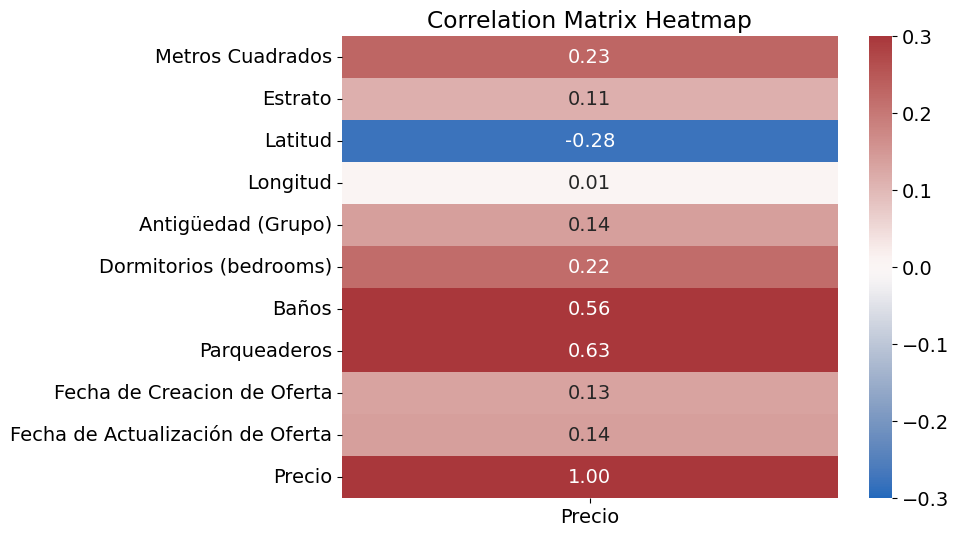

In [102]:
corr_matrix = a.join(b).corr()

single_col_corr = corr_matrix[["Precio"]]

plt.figure(figsize=(8, 6)) # Adjust figure size as needed

sns.heatmap(single_col_corr, annot=True, cmap='vlag', fmt=".2f", vmin=-0.3, vmax=0.3)

plt.title('Correlation Matrix Heatmap')
plt.show()

### Conformidad
#### El análisis de conformidad fue realizado como un breve análisis en la parte introductoria del notebook


### Consistencia
#### Verificaremos que las relaciones entre distintas columnas tengan sentido

In [ ]:
### Verificaré que las coordenadas de latitud y longitud correspondan al área metropolitana de Medellín.

lat_min, lat_max = 5.8384, 6.6384
lon_min, lon_max = -75.9271, -75.1271

# Estas cordenaadas las generamos seleccionando un cuadrado en un mapa de google maps.


# Suponiendo que tu DataFrame se llama df
# y las columnas son 'Latitud' y 'Longitudd'

df[
    (df['Latitud'] < lat_min) | (df['Latitud'] > lat_max) |
    (df['Longitud'] < lon_min) | (df['Longitud'] > lon_max)
]

### Encontramos un dato fuera del Área Metropolitana... Antes verificamos que todos tuvieran el departamento Antioquia, claramente es
### un error de la página donde aparece listado. Está significativamente fuera. Lo borraremos.



In [ ]:
df = df.drop(df[df["ID de la propiedad"] == 192701484].index)


#### Para un análisis más exhaustivo de consistencia se calculará la distancia de Mahalanobis para detectar outliers.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2

# --- Datos ---
# Asegúrate de tener cargado tu DataFrame con nombre df
# y que contenga las columnas "Precio" y "Metros Cuadrados"
X = df[["Precio", "Metros Cuadrados"]].dropna().astype(float)

# --- Calcular distancia de Mahalanobis ---
X_values = X.values
mu = np.mean(X_values, axis=0)
cov = np.cov(X_values, rowvar=False)
inv_cov = np.linalg.pinv(cov)

# Distancias cuadradas
diff = X_values - mu
md2 = np.sum(diff @ inv_cov * diff, axis=1)
threshold = chi2.ppf(0.99, df=2)  # nivel 99%

# --- Datos anómalos ---
outliers = md2 > threshold
anomalias = X.loc[outliers]
print("🔴 Datos anómalos (distancia de Mahalanobis > 99%):")
print(anomalias)

# --- Curva (contorno) de Mahalanobis ---
x = np.linspace(X["Metros Cuadrados"].min(), X["Metros Cuadrados"].max(), 100)
y = np.linspace(X["Precio"].min(), X["Precio"].max(), 100)
Xgrid, Ygrid = np.meshgrid(x, y)
XY = np.stack([Xgrid.ravel(), Ygrid.ravel()], axis=1)
diff_grid = XY - mu
md2_grid = np.sum(diff_grid @ inv_cov * diff_grid, axis=1).reshape(Xgrid.shape)

# --- Gráfico ---
plt.figure(figsize=(8,6))
plt.scatter(X["Metros Cuadrados"], X["Precio"], c="gray", alpha=0.6, label="Datos")
plt.contour(Xgrid, Ygrid, md2_grid, levels=[threshold], colors="red", linewidths=2)
plt.scatter(anomalias["Metros Cuadrados"], anomalias["Precio"], c="red", label="Anómalos", alpha=0.8)
plt.xlabel("Metros Cuadrados")
plt.ylabel("Precio")
plt.title("Curva de Mahalanobis (99%) — Precio vs Metros Cuadrados")
plt.legend()
plt.show()

**Análisis de Mahalanobis**: Como se puede ver hay precios extremadamente altos y, aunque algo difícil de ver, hay 
metros cuadrados absurdamente altos. Estos datos por sí solos pueden ser razonables (un precio muy alto de una casa), pero
junto a los metros cuadrados, parecen salirse de la muestra. También hay un área irracionalmente alta que no tiene sentido alguno.

Decidimos borrar estos outliers extremos ahora sólo para ver mejor el gráfico de mahalanobis. Aunque somos conscientes de que esto cae en la sección "detección de outliers".

In [ ]:
Y = df[["Precio", "Metros Cuadrados"]].astype(float)


Y = Y[(Y["Precio"] < 1e11) & (Y["Metros Cuadrados"] < 20000)]

In [ ]:
# --- Calcular distancia de Mahalanobis ---
Y_values = Y.values
mu = np.mean(Y_values, axis=0)
cov = np.cov(Y_values, rowvar=False)
inv_cov = np.linalg.pinv(cov)

# Distancias cuadradas
diff = Y_values - mu
md2 = np.sum(diff @ inv_cov * diff, axis=1)
threshold = chi2.ppf(0.99, df=2)  # nivel 99%

# --- Datos anómalos ---
outliers = md2 > threshold
anomalias = Y.loc[outliers]
print("🔴 Datos anómalos (distancia de Mahalanobis > 99%):")
print(anomalias)

# --- Curva (contorno) de Mahalanobis ---
x = np.linspace(Y["Metros Cuadrados"].min(), Y["Metros Cuadrados"].max(), 100)
y = np.linspace(Y["Precio"].min(), Y["Precio"].max(), 100)
Xgrid, Ygrid = np.meshgrid(x, y)
XY = np.stack([Xgrid.ravel(), Ygrid.ravel()], axis=1)
diff_grid = XY - mu
md2_grid = np.sum(diff_grid @ inv_cov * diff_grid, axis=1).reshape(Xgrid.shape)

# --- Gráfico ---
plt.figure(figsize=(8,6))
plt.scatter(Y["Metros Cuadrados"], Y["Precio"], c="gray", alpha=0.6, label="Datos")
plt.contour(Xgrid, Ygrid, md2_grid, levels=[threshold], colors="red", linewidths=2)
plt.scatter(anomalias["Metros Cuadrados"], anomalias["Precio"], c="red", label="Anómalos", alpha=0.8)
plt.xlabel("Metros Cuadrados")
plt.ylabel("Precio")
plt.title("Curva de Mahalanobis (99%) — Precio vs Metros Cuadrados")
plt.legend()
plt.show()

### Análisis
Del anterior gráfico creemos que Mahalanobis no captura la escencia del dataset para separar los outliers. Esto puede basarse en que la distancia Mahalanobis hace ciertos supuestos como que los datos provienen de una distrubición normal y que, seguramente la distribución de los precios de propiedades raíces tiene una cola pesada a la derecha (propiedades muy caras), o que si una casa es grande probablemente se dirige a un público con más capital y el precio por metro cuadrado aumenta.



### Replanteamiento: K-Means

### [Añadir aquí los cambios hechos por Tomás]

In [ ]:
df[df["Precio"] < 100000000][["URL"]]

#### Precisión/Exactitud:

In [ ]:
df[(( df['Estrato']< 1 ) | (df['Estrato'] > 6 )) & (df['Estrato'] != 0)]["Ciudad"].count()

# Sólo hay 21 resultados donde el estrato no corresponde a lo estandarizado (1 a 6) aparte del valor nulo 0. 
# Notamos algo muy particular, en estos 21 resultados se repite algo...

In [ ]:
df[(( df['Estrato']< 1 ) | (df['Estrato'] > 6 )) & (df['Estrato'] != 0)]["Estrato"].unique()

In [ ]:
# Valores 110, 100 y el gracioso 7.

df[df["Estrato"].isin([7])].iloc[1]["URL"]

In [ ]:
# Analizando las dos propiedades, una cuesta 8 mil millones de pesos y la otra cuesta 2.2 mil millones de pesos.

# Viendo sus ubicaciones están afuera de la ciudad, y más importante, al consultar la página web dice "Estrato Campestre" en una (la de 8 mil)
# en la otra dice literalmente Estrato 7. 

# Se eliminan estas propiedades en la fase de preparación del modelo, es importante saber que existen.

In [ ]:
df[df["Estrato"].isin([110, 100])]["URL"].count()

# ¿Qué hay de las otras 19 estrato 110 y 100?

In [ ]:
df[df["Estrato"].isin([110])][["URL", "Estrato"]].iloc[4]

# En el caso 110, parece que es otra forma de decir NA

Encontramos que el hay 236 registros donde sus estratos no corresponden a los estandarizados por el gobierno, es decir registros erróneos

In [ ]:
df[(df['Precio'] <= 100000000) |  (df['Precio'] > 100000000000)]

Curioso, dos casas muy baratas! Una de 1 peso y una de 55 millones. Ademas 4 casas sorprendentemente caras, seguramente sean precios erróneos

In [ ]:
df['Baños'].unique()

In [ ]:
df['Dormitorios (bedrooms)'].unique()

Seguramente hay casas de 15 baños, pero quizas se pueda revisar. Se ve por el analisis de mahalanobis que estos numeros combinan con los metros cuadrados.

### Análisis de "Localidad Principal"

Las columnas de localidad principal y tipo de localidad principal no son precisas. Ya que en algunos registros, esta describe la ciudad, en otros, el barrio y en otros la comuna o zona. Esto es debido a que es dependiente de lo que registró el dueño de la propiedad. Si no especificó el barrio, o la zona, se pone la ciudad. Sin embargo, las columnas de latitud y longitud cumplen el mismo trabajo, ya que las casas cercanas, tienen una latitud y longitud cercana una a otra. Por ende es pertinente borrar estas dos columnas categóricas al no aportar al modelo información adicional de lo que da la latitud y longitud.

#### Duplicados 

In [ ]:
df.duplicated().sum()

Hay 170 registros duplicados, sin embargo quiero ver ademas segun el ID cuantos registros hay duplicados, y con el url

In [ ]:
df['URL'].duplicated().sum()

In [ ]:
df['ID de la propiedad'].duplicated().sum()

In [ ]:
df[df[['Latitud', 'Longitud']].duplicated()][['ID de la propiedad','Latitud', 'Longitud', 'URL']]

Hay casas con latitud y longitud repetida, pero son registros distintos (esto se puede ver ya que el ID es distinto, y al ingresar a la URL, la casa es distinta). Por ende, la latitud y longitud expresan unicamente el sector especifico donde esta la casa, mas no exactamente la ubicacion. De hecho al ver Localidad Principal de repetidos, se puede ver que estan en la misma zona. 

#### Integridad

Debido a la fuente de los datos, no es necesario hacer un análisis de integridad

In [ ]:
df.describe()

Se ven cosas curiosas, como que el estrato de uno de los registros sea 110. 

De resto, las otras columnas aparentan ser normales, aunque los metros cuadrados y los pisos tienen una excepción extraña, donde el máximo parece ser de 133377. Eso es un resultado un poco loco, dado en cuenta que el tercer cuartil es de 114, y el piso máximo es el 97 (no se que edificio tiene 97 pisos en el valle de aburrá) y el mínimo es el -1, que podría ser un sótano o un error. Un precio máximo de 6.3 e11 también es muy muy muy elevado, altamente probable que este sea una anomalía.


# Modelo con datos

La siguiente sección se hará en el siguiente archivo: ModellingPhase.ipynb